In [1]:
from models.unet import unet_b_encoder
import torch
from analysis import extract_embeddings,knn_evaluation, tsne_visualization,load_encoder_weights

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = unet_b_encoder(input_channels=1).to(device)

checkpoint_path = "checkpoints/unet_b_100.ckpt"
load_encoder_weights(checkpoint_path, model)

Loading from PyTorch Lightning checkpoint
Extracting encoder weights from full model checkpoint
Extracted 40 encoder weights
Encoder weights loaded successfully!


In [3]:
from utils.datasets import create_pd_data_loaders

train_loader, val_loader, test_loader = create_pd_data_loaders(
    data_dir="data/PD", batch_size=8, num_workers=4
)

print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")


Training samples: 416
Validation samples: 84
Test samples: 334


In [ ]:
train_emb, train_meta = extract_embeddings(model, device, train_loader)
val_emb, val_meta = extract_embeddings(model, device, val_loader)
test_emb, test_meta = extract_embeddings(model, device, test_loader)

Extracting embeddings: 100%|██████████| 416/416 [00:27<00:00, 15.07it/s]


Extracted embeddings shape: (416, 110592)
Number of samples: 416


Extracting embeddings: 100%|██████████| 84/84 [00:05<00:00, 15.29it/s]


Extracted embeddings shape: (84, 110592)
Number of samples: 84


Extracting embeddings: 100%|██████████| 334/334 [00:22<00:00, 14.96it/s]

Extracted embeddings shape: (334, 110592)
Number of samples: 334


In [5]:
embeddings = {"train": train_emb, "val": val_emb, "test": test_emb}
metadata = {"train": train_meta, "val": val_meta, "test": test_meta}


K-NN EVALUATION: UNET_B

=== DISEASE STATUS CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.6078
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       164
           1       0.62      0.61      0.61       170

    accuracy                           0.61       334
   macro avg       0.61      0.61      0.61       334
weighted avg       0.61      0.61      0.61       334



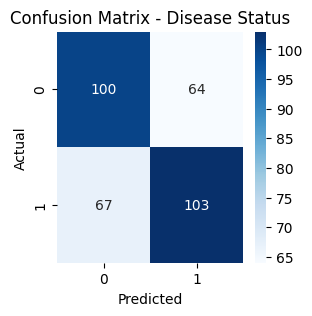


=== SEX CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.5928
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.51      0.51       141
           1       0.65      0.65      0.65       193

    accuracy                           0.59       334
   macro avg       0.58      0.58      0.58       334
weighted avg       0.59      0.59      0.59       334



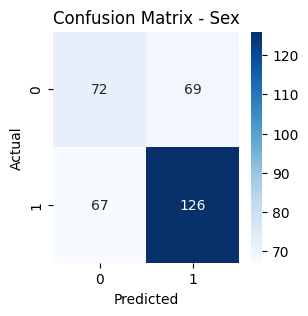


=== STUDY CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.6587
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        48
           1       0.60      0.87      0.71        98
           2       0.63      0.26      0.37        46
           3       0.58      0.61      0.59        31
           4       0.76      0.76      0.76        17
           5       0.67      0.11      0.19        18
           6       0.75      0.38      0.50        24
           7       0.58      0.47      0.52        15
           8       1.00      1.00      1.00        37

    accuracy                           0.66       334
   macro avg       0.69      0.58      0.59       334
weighted avg       0.67      0.66      0.63       334



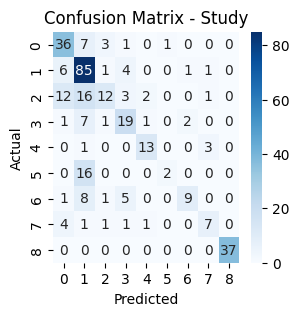


=== SCANNER TYPE CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.7216
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        48
           8       0.59      0.76      0.67        17
          12       0.59      0.71      0.65        31
          13       0.73      0.80      0.76       144
          14       1.00      1.00      1.00        37
          16       0.58      0.47      0.52        15
          17       0.82      0.38      0.51        24
          18       0.67      0.11      0.19        18

    accuracy                           0.72       334
   macro avg       0.71      0.62      0.63       334
weighted avg       0.73      0.72      0.71       334



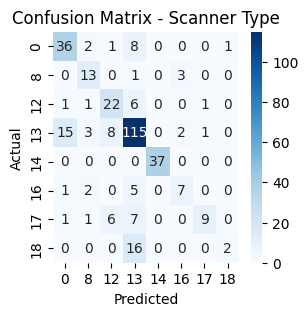


K-NN RESULTS SUMMARY
          Task  K-NN Accuracy
Disease Status       0.607784
           Sex       0.592814
         Study       0.658683
  Scanner Type       0.721557


In [6]:
knn_results = knn_evaluation(embeddings, metadata, "UNet_B", k=5)




T-SNE VISUALIZATION: UNET_B
Computing t-SNE for 834 samples...


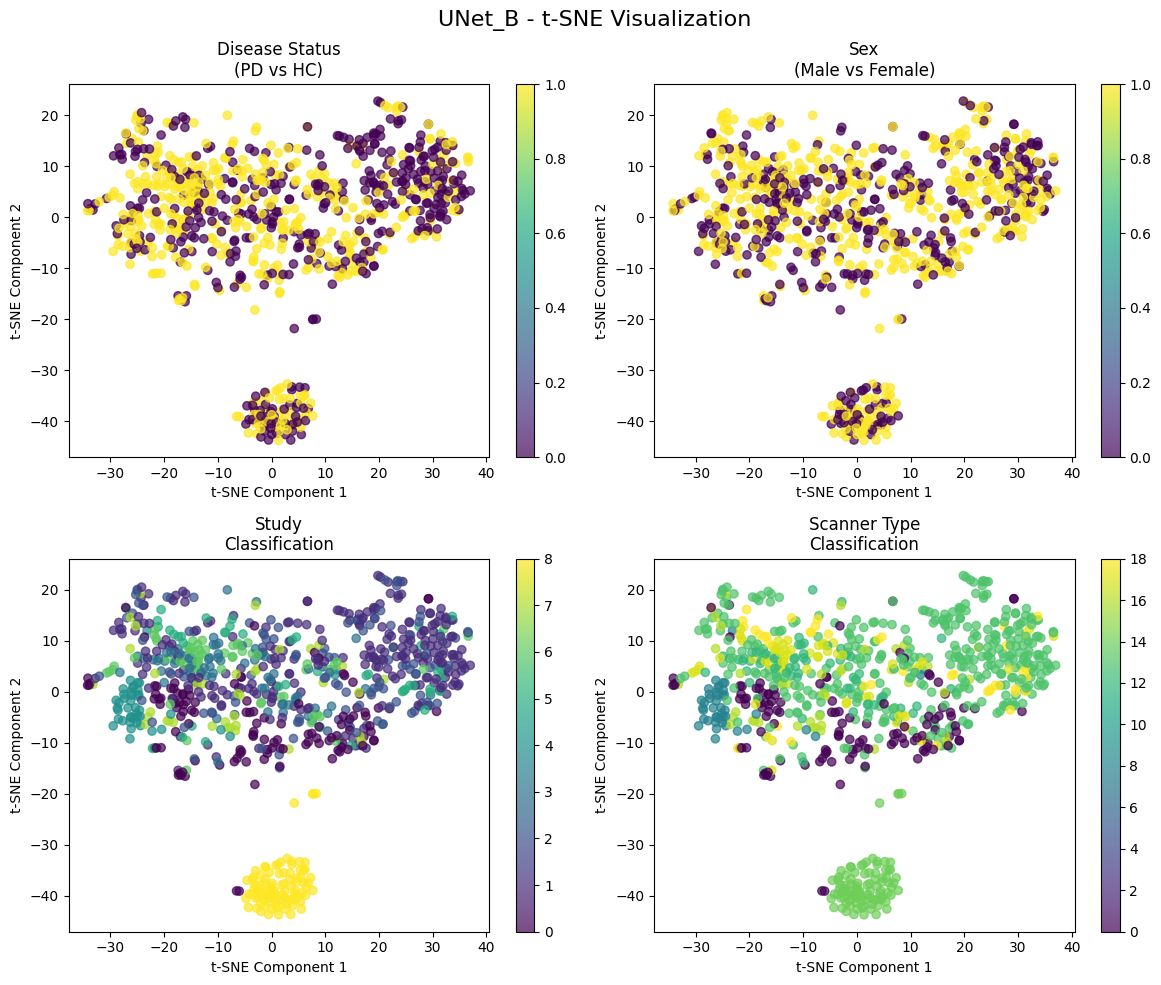

In [7]:
tsne_results = tsne_visualization(embeddings, metadata, "UNet_B", perplexity=30)
